#### Importing libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#### Loading Dataset 

In [41]:
df = pd.read_csv("../data/data.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [42]:
df[df["isFraud"]==1].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [44]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#### Exploratory Data Analysis 

In [45]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [46]:
df.isnull().value_counts()

step   type   amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
False  False  False   False     False          False           False     False           False           False    False             6362620
Name: count, dtype: int64

In [47]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [48]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

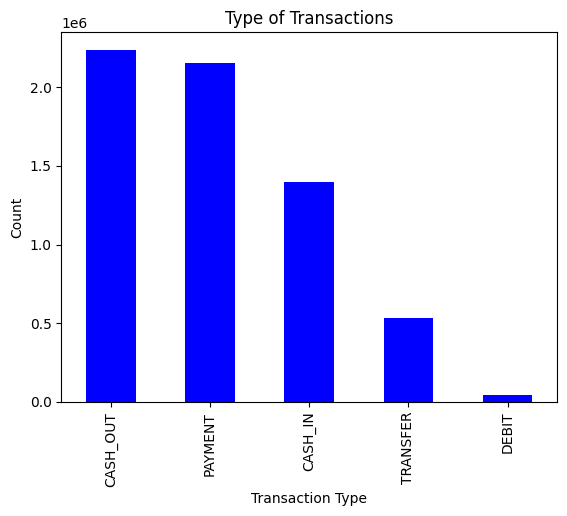

In [49]:
df['type'].value_counts().plot(kind='bar', title='Type of Transactions' , color= 'blue')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

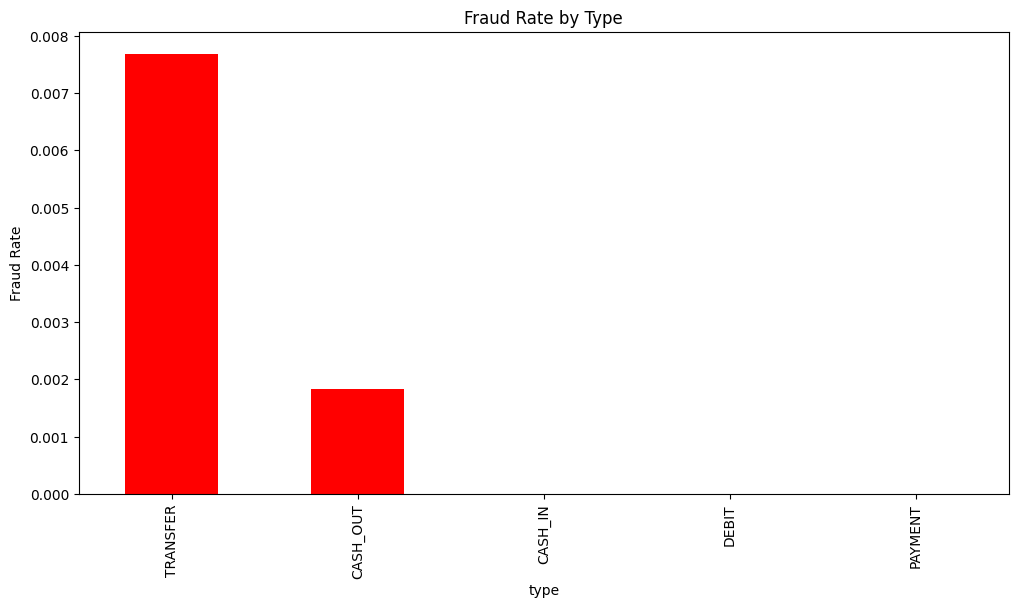

In [50]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending= False)
plt.figure(figsize=(12,6))
fraud_by_type.plot(kind= 'bar', color= 'red', title='Fraud Rate by Type')
plt.ylabel("Fraud Rate")
plt.show()

In [51]:
fraud_users = df[df["isFraud"]==1]['nameOrig'].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [52]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

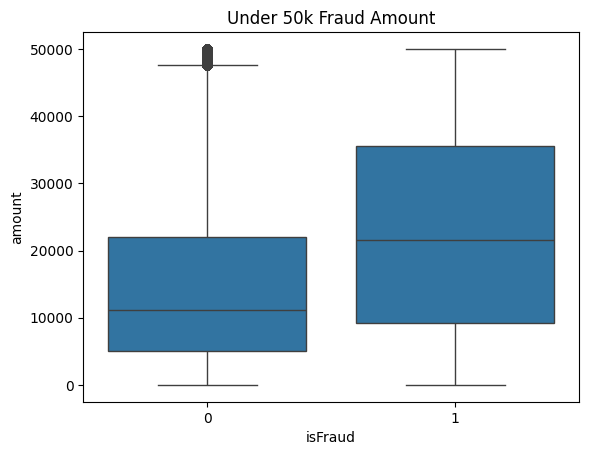

In [53]:
sns.boxplot(data = df[df['amount'] < 50000], x = 'isFraud', y = 'amount')
plt.title('Under 50k Fraud Amount')
plt.show()

In [54]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [55]:
(df['balanceDiffOrig'] < 0).sum()

np.int64(1399253)

In [56]:
(df['balanceDiffDest'] < 0).sum()

np.int64(1238864)

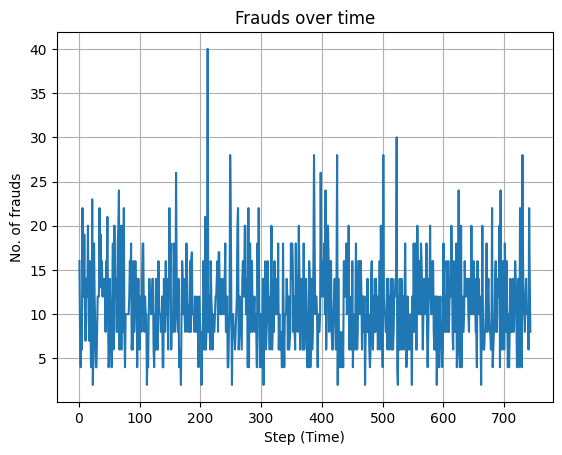

In [57]:
frauds_rate = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(frauds_rate.index, frauds_rate.values, label = 'Frauds per step')
plt.xlabel('Step (Time)')
plt.ylabel('No. of frauds')
plt.title('Frauds over time')
plt.grid(True)

In [58]:
frauds_rate.sort_values(ascending=False).head(10)

step
212    40
523    30
501    28
387    28
249    28
425    28
730    28
160    26
398    26
694    24
Name: count, dtype: int64

In [59]:
corr= df.drop(df.select_dtypes(include=['object']).columns, axis=1).corr()

In [60]:
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.007255,0.001325
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,0.102337,0.845964
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.220297,-0.087032
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.267750,-0.094456
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,-0.047460,0.232316
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,-0.006451,0.436191
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.362472,0.027028
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.000230,-0.000242
balanceDiffOrig,0.007255,0.102337,-0.220297,-0.267750,-0.047460,-0.006451,0.362472,0.000230,1.000000,0.169292
balanceDiffDest,0.001325,0.845964,-0.087032,-0.094456,0.232316,0.436191,0.027028,-0.000242,0.169292,1.000000


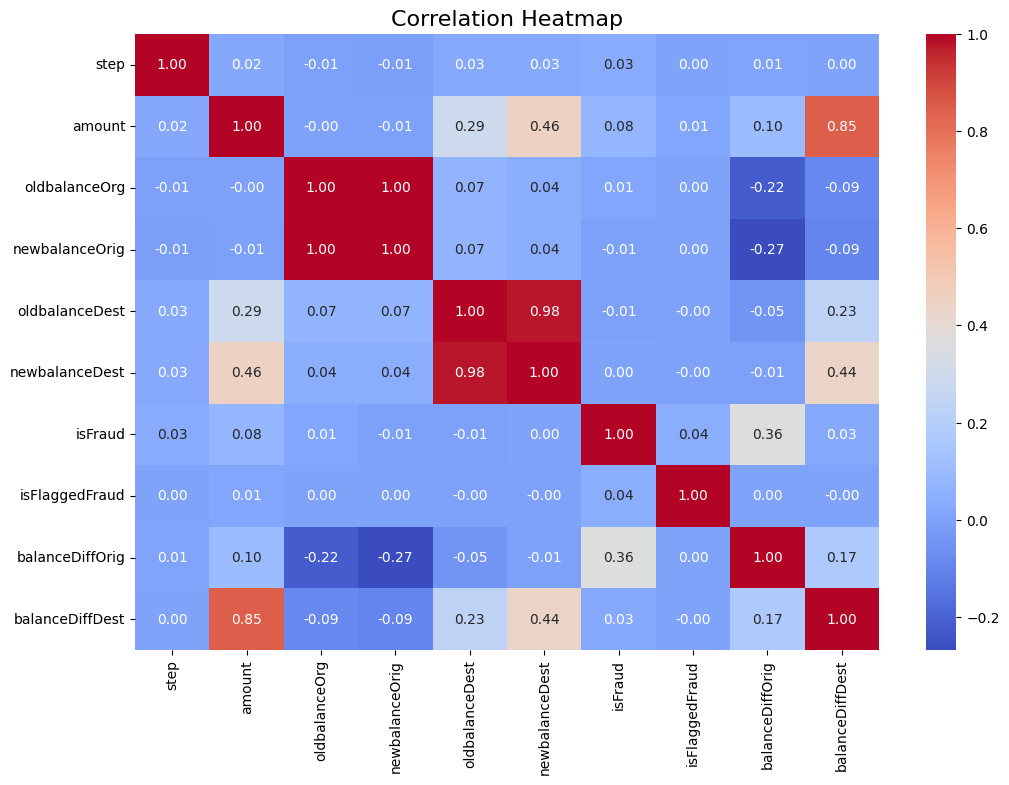

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


#### Feature Engineering

In [62]:
df_model = df.drop(['step','nameOrig', 'nameDest', 'isFlaggedFraud', 'balanceDiffOrig','balanceDiffDest'], axis= 1)

In [63]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [64]:
X= df_model.drop(['isFraud'], axis=1)
y= df_model['isFraud']

#### Training the Model

In [65]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_test, X_cv, y_test, y_cv= train_test_split(X_temp, y_temp, test_size=0.5,random_state=42, stratify=y_temp )



In [66]:
categorical= ['type']
numerical=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'] #,'balanceDiffOrig','balanceDiffDest']

In [67]:
ct = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
], remainder='drop',
verbose_feature_names_out=False)

In [68]:
pipeline = Pipeline([
    ('prep', ct),
    ('model', LogisticRegression(class_weight = 'balanced', max_iter = 1000, random_state=42))
])

In [69]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [70]:
y_hat_cv =pipeline.predict(X_cv)
accuracy_score(y_cv, y_hat_cv)

0.9460206644432639

In [71]:
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.9461385404125974

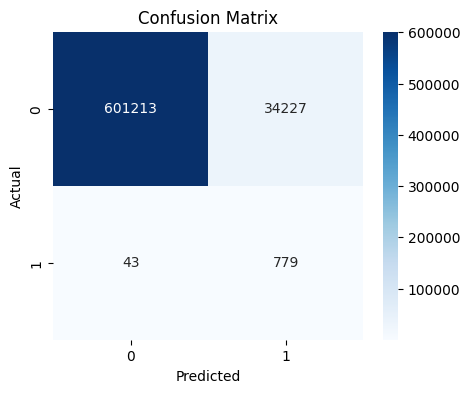

In [72]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [73]:
import pickle

In [74]:
with open("model.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [75]:
import shap

In [76]:
preprocessor = pipeline.named_steps["prep"]
clf = pipeline.named_steps["model"]

# Step 2: Transform the input (raw dataframe) -> numeric features
X_transformed = preprocessor.transform(X_train)
feature_names = pipeline.named_steps['prep'].get_feature_names_out()

# Step 3: Run SHAP on the transformed data and the logistic regression
explainer = shap.Explainer(clf, X_transformed, feature_names=feature_names)

In [77]:
with open("explainer.pkl", "wb") as f:
    pickle.dump(explainer, f)